# MODELING RUMORS: THE NO PLANE PENTAGON FRENCH HOAX CASE

A python based implementation of the technique described in the paper "[Modeling Rumors:The No Plane Pentagon French Hoax Case](https://arxiv.org/abs/cond-mat/0211571)" by [Serge Galam](mailto:galam@ccr.jussieu.fr) of CNRS, Paris.

**ABSTRACT :**  
The recent astonishing wide adhesion of french people to the rumor claiming ‘No plane did crash on the Pentagon on September the 11”, is given a generic explanation in terms of a model of minority opinion spreading. Using a majority rule reaction-diffusion dynamics, a rumor is shown to invade for sure a social group provided it fulfills simultaneously two criteria. First it must initiate with a support beyond some critical threshold which however, turns out to be always very low. Then it has to be consistent with some larger collective social paradigm of the group. Othewise it just dies out. Both conditions were satisfied in the french case with the associated book sold at more than 200 000 copies in just a few days. The rumor was stopped by the firm stand of most newspaper editors stating it is nonsense. Such an incredible social dynamics is shown to result naturally from an open and free public debate among friends and colleagues. Each one searching for the truth sincerely on a free will basis and without individual biases. The polarization process appears also to be very quick in agreement with reality. It is a very strong anti-democratic reversal of opinion although made quite democratically. The model may apply to a large range of rumors.


In [1]:
import numpy as np
from sympy.solvers import solve
from sympy import Symbol
import math
import matplotlib.pyplot as plt

In [2]:
def nCr(n,r):
    f = math.factorial
    return f(n) / (f(r)*f(n-r))

## Some Important Variables

In this section we setup some important variables which are required for the running of the code.  
*MaxGroupSize*- Defines the biggest group size a person can interact with (IMHO should not exceed the group of 7 people in small social gatherings).  
*maxDays*- The no. of days you want to study the evolution of people's believe  
*BelieveTruth* - The ratio of people believing in the truth(not believing the rumor)

In [3]:
MaxGroupSize=7     #DO NOT CHANGE!! 
maxDays=20         
BelieveTruth=0.90 

## Bulding the Probability of Interaction in Every GroupSize

This section creates the probability distrubution for each size of group that a single person interacts with in a single day. Uncomment each of the array indexes and enterthe no. of times the population interact with other people equal to the index of a in a day. The example below should give more clarity.

examples:

* a[0]=2 -> means the population interacts with 0 people 2 times a day (Talk to themselves maybe ;P)
* a[3]=5 -> means the population interacts with 3 people 5 times a day

In [4]:
a=np.zeros(MaxGroupSize)
#a[0]=0
a[1]=1
#a[2]=0
a[3]=3
#a[4]=0
#a[5]=0
#a[6]=5
a=a/a.sum()

## What is the killing point?

This section determines the killing points for the interaction pattern described in the prevoius section.

In [5]:
 x = Symbol('x')
potentialKillingPoints=np.array(solve((a[0]-1)*x
                              +(a[1]+3*a[2])*x**2
                              +(-2*a[2]+4*a[3]+10*a[4])*x**3
                              +(-3*a[3]-15*a[4]+15*a[5]+35*a[6])*x**4
                              +(6*a[4]-24*a[5]-84*a[6])*x**5
                              +(10*a[5]+70*a[6])*x**6
                              +50*a[6]*x**7, x))

In [6]:
potentialKillingPoints=potentialKillingPoints.real
location=np.where(np.logical_and(potentialKillingPoints>0, potentialKillingPoints<1))
KillingPoints=float(potentialKillingPoints[location])
print("The killing point is at",KillingPoints)

The killing point is at 0.8538509376029434


## Will the rumor survive or die out?

This section tries to identify wheter the rumor will survive or die out. The check simply checks if the intial number of people believing in the truth is higher than the kiling point the rumor will die out. Else, The rumor will survive and spread in the population.  

In [7]:
if BelieveTruth>KillingPoints :
    print("The rumor will die out from the population")
else:
    print("The rumor will spread throughout the population")

The rumor will die out from the population


## How does the rumor evolve over time?

In [8]:
P_plus=np.zeros(maxDays)
P_plus[0]=BelieveTruth
t=0
innersum=0
outersum=0


In [9]:
for t in range(0,maxDays-1):
    for k in range(1,MaxGroupSize+1):
        for j in range(int(k/2+1),k+1):
            innersum=innersum+nCr(k,j)*(P_plus[t]**j)*(1-P_plus[t])**(k-j)
        outersum=outersum+a[k-1]*innersum
        innersum=0
    P_plus[t+1]=outersum
    outersum=0

## Lets visualize it all

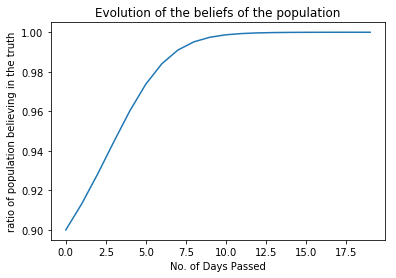

In [10]:
plt.plot(P_plus)
plt.title('Evolution of the beliefs of the population')
plt.ylabel("ratio of population believing in the truth")
plt.xlabel("No. of Days Passed")
plt.show()